creating a prgram/functin that can answer a questin from chapter 7 handbook of Q. ecology
- pprobabilyt we will find 2 eggs in 1st nest we check?
- prbabilty team will get 3 nest in a row wiht 1 egg?
- average number of eggs per nest?

for code
- be able to adjust the input parameters


Average number of eggs per nest: 1.90
Probability of finding 1, 2, or 3 eggs in a nest: 0.7251
Probability of finding exactly 2 eggs in a nest: 0.2700
Probability of getting 3 nests in a row with exactly 1 egg: 0.022950


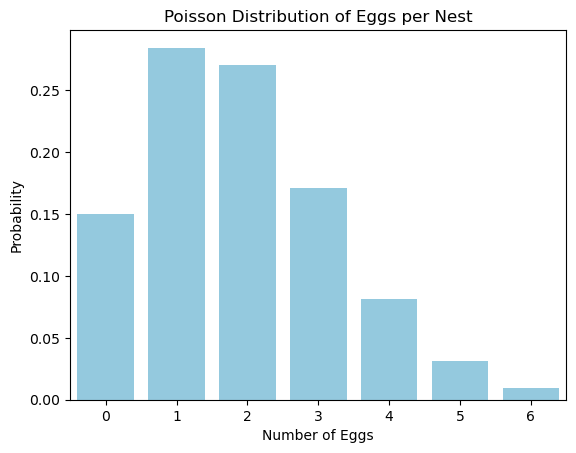

In [10]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_nests(nests, plot=True):
    """
    Analyze egg counts per nest and display Poisson statistics.

    Parameters:
    - nests (list): List of integers representing egg counts in each nest.
    - plot (bool): Whether to show the Poisson distribution plot.

    Returns:
    - dict: Dictionary containing calculated values.
    """

    # Calculate average eggs per nest
    average_eggs = np.mean(nests)
    print(f"Average number of eggs per nest: {average_eggs:.2f}")

    # Create a Poisson distribution
    poisson_dist = poisson(mu=average_eggs)

    # Compute probabilities
    prob_2_eggs = poisson_dist.pmf(2)
    prob_1_egg = poisson_dist.pmf(1)
    prob_3_nests_1_egg = prob_1_egg ** 3

    # Probability of finding 1, 2, or 3 eggs in a nest
    prob_1_2_3_eggs = sum(poisson_dist.pmf(k) for k in [1, 2, 3])
    print(f"Probability of finding 1, 2, or 3 eggs in a nest: {prob_1_2_3_eggs:.4f}")

    print(f"Probability of finding exactly 2 eggs in a nest: {prob_2_eggs:.4f}")
    print(f"Probability of getting 3 nests in a row with exactly 1 egg: {prob_3_nests_1_egg:.6f}")

    # Plot distribution if requested
    if plot:
        x = np.arange(0, int(np.max(nests)) + 4)
        pmf_values = poisson_dist.pmf(x)
        sns.barplot(x=x, y=pmf_values, color='skyblue')
        plt.title('Poisson Distribution of Eggs per Nest')
        plt.xlabel('Number of Eggs')
        plt.ylabel('Probability')
        plt.xticks(x)
        plt.show()

    # Return key statistics for further use
    return {
        'average_eggs': average_eggs,
        'prob_2_eggs': prob_2_eggs,
        'prob_3_nests_1_egg': prob_3_nests_1_egg
    }

# use values:
nests_1 = [1]*4 + [2]*14 + [3]*2
results = analyze_nests(nests_1)

Average number of eggs per nest: 1.81
Probability of finding exactly 2 eggs in a nest: 0.2681
Probability of getting 3 nests in a row with exactly 1 egg: 0.025945


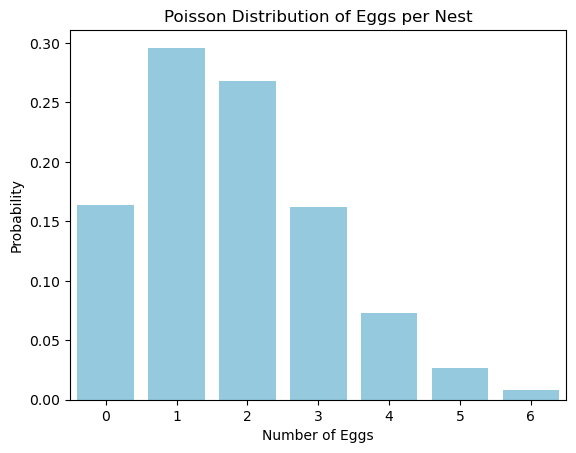

In [6]:
nests_2 = [1]*17 + [2]*29 + [3]*7
results = analyze_nests(nests_2)